In [51]:
# Amazon Sales Data Analysis

### Project Overview
#In this study, I am conducting an end-to-end data analysis process using real sales data from Amazon. My goal is to clean, visualize, and examine sales trends to derive meaningful business insights. 

### Dataset Column Descriptions
# **order_id:** Unique identifier for each order.
# **order_date:** The date the transaction took place.
# **product_id:** Unique identifier for the product.
# **product_category:** The category of the product (e.g., Fashion, Electronics).
# **price:** The original price of the product.
# **discount_percent:** The percentage of discount applied.
# **discounted_price:** The final price after discount.
# **quantity_sold:** The number of units sold.
# **total_revenue:** Calculated as `discounted_price * quantity_sold`.
# **customer_region:** Geographic location of the customer.
# **payment_method:** Payment type (Credit Card, UPI, etc.).
# **rating:** Customer rating (1-5).
# **review_count:** Total number of customer reviews.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://github.com/qui-ce-moi/Amazon_Sales_Analysis/blob/main/amazon_sales_dataset.csv")
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [54]:
df["order_date"] = pd.to_datetime(df["order_date"])
mindat = df["order_date"].min()
maxdat = df["order_date"].max()
print(f"en erken tarih: {mindat.date()}\n en geç tarih: {maxdat.date()}")

en erken tarih: 2022-01-01
 en geç tarih: 2023-12-31


In [55]:
df.groupby("product_category")["price"].agg(["min", "max", "mean","count","median","std"])

,min,max,mean,count,median,std
product_category,,,,,,
Beauty,5.30,499.93,252.405289,8465,252.560,142.298185
Books,5.01,499.96,252.682468,8327,254.830,142.819741
Electronics,5.04,499.99,251.893404,8320,251.105,142.716925
Fashion,5.44,499.99,252.347879,8365,252.600,143.593115
Home & Kitchen,5.03,499.89,253.812631,8258,255.100,143.551335
Sports,5.02,499.91,251.910161,8265,251.360,143.218638


In [56]:
df.groupby(df["order_date"].dt.year)["product_category"].value_counts()


order_date  product_category
2022        Sports              4192
            Beauty              4175
            Books               4159
            Fashion             4153
            Electronics         4131
            Home & Kitchen      4116
2023        Beauty              4290
            Fashion             4212
            Electronics         4189
            Books               4168
            Home & Kitchen      4142
            Sports              4073
Name: count, dtype: int64

In [57]:
#Spor ürünleri ve güzellik ürünleri arasında anlamlı bir fark var mı?:
from scipy.stats import chi2_contingency
sporveguzellik =pd.crosstab(df["order_date"].dt.year,df["product_category"])
chi2,p,dof,expected = chi2_contingency(sporveguzellik)
print("Chi-square statistic:",chi2)
print("p-value:",p)
print("Degrees of freedom:",dof)
print("Expected values:\n",expected)
if p<0.05:
    print("There is a significant difference between sports products and beauty products.")
else:
    print("There is no significant difference between sports products and beauty products.")

Chi-square statistic: 3.7496909041556696
p-value: 0.585986893950784
Degrees of freedom: 5
Expected values:
 [[4219.9718  4151.17604 4147.6864  4170.1198  4116.77816 4120.2678 ]
 [4245.0282  4175.82396 4172.3136  4194.8802  4141.22184 4144.7322 ]]
There is no significant difference between sports products and beauty products.


<Axes: title={'center': 'Distribution of Sports Products Prices in Sports Category'}, xlabel='price', ylabel='Count'>

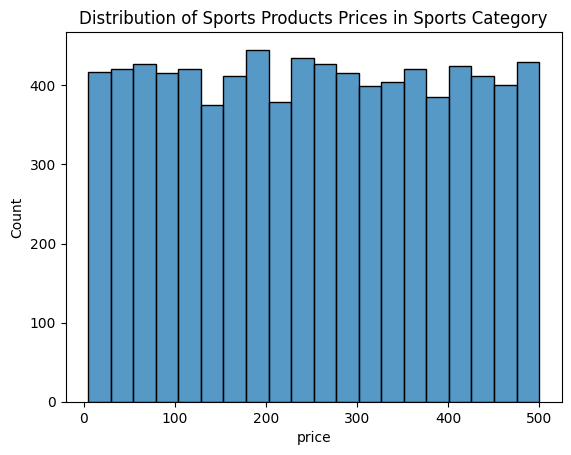

In [58]:
#Distribution of sports products prices
spor_urunleri = df[df["product_category"]=="Sports"]
plt.title("Distribution of Sports Products Prices in Sports Category")
sns.histplot(data=spor_urunleri,x="price",bins=20)


In [59]:
# Mean price by country
ulkelere_gore_fiyat_ortalamasi = df.groupby("customer_region")["price"].median().reset_index()
ulkelere_gore_fiyat_ortalamasi

,customer_region,price
0,Asia,253.11
1,Europe,250.41
2,Middle East,253.43
3,North America,254.76


In [60]:
# Mean and standard deviation of price by country and product category
df.groupby(["customer_region","product_category"]).agg({"price":["mean","std"]})

price            
                                        mean         std
customer_region product_category                        
Asia            Beauty            256.095926  140.929746
                Books             253.426687  144.028878
                Electronics       248.554180  142.462089
                Fashion           251.029274  145.617614
                Home & Kitchen    252.900034  142.593402
                Sports            250.953774  145.136106
Europe          Beauty            249.633464  144.028200
                Books             250.468752  144.212617
                Electronics       254.860994  140.858966
                Fashion           248.657576  143.844560
                Home & Kitchen    255.139047  144.279464
                Sports            251.146203  141.469844
Middle East     Beauty            252.787118  142.626156
                Books             254.521084  140.444504
                Electronics       252.658236  142.804100
                Fashion           253.567715  143.098840
                Home & Kitchen    253.947163  142.767105
                Sports            250.942350  142.285053
North America   Beauty            251.154473  141.623527
                Books             252.191723  142.644981
                Electronics       251.521431  144.746864
                Fashion           256.146975  141.849868
                Home & Kitchen    253.297047  144.667651
                Sports            254.581561  144.014405

In [61]:
#customer region,product category ve total revenue pivot table
uc_degiskenli = df.pivot_table(values="total_revenue",index=["customer_region"],columns="product_category",aggfunc="mean")

uc_degiskenli.unstack()


product_category  customer_region
Beauty            Asia               667.261742
                  Europe             643.709204
                  Middle East        663.342237
                  North America      648.829635
Books             Asia               643.235531
                  Europe             653.571439
                  Middle East        676.081434
                  North America      662.199513
Electronics       Asia               630.834271
                  Europe             675.849635
                  Middle East        668.431575
                  North America      655.188603
Fashion           Asia               658.679778
                  Europe             639.263921
                  Middle East        663.277004
                  North America      659.687802
Home & Kitchen    Asia               659.449422
                  Europe             655.024474
                  Middle East        661.320442
                  North America      675.089123
Sports

In [62]:
#Mean rating by country
rating_mean = df.groupby("customer_region")["rating"].mean()
print(rating_mean)

customer_region
Asia             2.995721
Europe           2.973651
Middle East      3.015434
North America    3.000360
Name: rating, dtype: float64


In [63]:
#Filtering by region
asia = df[df["customer_region"] == "Asia"]
europe = df[df["customer_region"] == "Europe"]
america = df[df["customer_region"] == "America"]

print(asia)
print(europe)
print(america)

       order_id order_date  product_id product_category   price  \
1             2 2023-03-12        2300          Fashion  302.60   
5             6 2023-12-02        1777           Sports  385.17   
6             7 2022-01-21        4068            Books   15.78   
8             9 2022-05-02        3262            Books  373.62   
18           19 2023-10-24        1968   Home & Kitchen  262.36   
...         ...        ...         ...              ...     ...   
49986     49987 2022-11-07        4956      Electronics  338.40   
49987     49988 2023-01-30        4670            Books  166.87   
49990     49991 2023-04-08        2689           Beauty  265.49   
49996     49997 2022-07-03        1428           Beauty  294.23   
49997     49998 2023-02-17        4651      Electronics  352.11   

       discount_percent  quantity_sold customer_region    payment_method  \
1                    20              5            Asia       Credit Card   
5                    30              3     

In [64]:
#ANOVA test for rating by country
from scipy.stats import f_oneway
gruplar = [df["rating"].values for name, group in df.groupby("customer_region")]
f_oneway(*gruplar)

f_stat, p_value = f_oneway(*gruplar)
print(f"ANOVA P-Değeri: {p_value}")

if p_value < 0.05:
    print("At least one region is significantly different from the others.")
else:
    print("There is no significant difference between the regions.")

ANOVA P-Değeri: 1.0
There is no significant difference between the regions.


In [65]:
#Pivot table for review count by region and category
df.groupby("customer_region")["review_count"].sum()
review_pivot = df.pivot_table(index=["customer_region", "product_category"], values="review_count", aggfunc="sum").unstack()
review_pivot

review_count                                             \
product_category       Beauty   Books Electronics Fashion Home & Kitchen   
customer_region                                                            
Asia                   523112  528482      522777  503293         518691   
Europe                 511148  510654      519683  529645         506966   
Middle East            516412  526754      509149  523784         526055   
North America          545100  495643      513829  535814         524680   

                          
product_category  Sports  
customer_region           
Asia              511738  
Europe            523147  
Middle East       518127  
North America     521781

In [66]:
#Pivot table for review count by region and category
df.groupby("customer_region")["review_count"].sum()
sold_pivot = df.pivot_table(index=["customer_region", "product_category"], values="quantity_sold", aggfunc="sum").unstack()
sold_pivot


quantity_sold                                                
product_category        Beauty Books Electronics Fashion Home & Kitchen Sports
customer_region                                                               
Asia                      6317  6378        6127    6138           6220   6260
Europe                    6321  6142        6296    6396           6017   6130
Middle East               6284  6517        6259    6303           6156   6175
North America             6500  6028        6216    6252           6350   6188

In [67]:
# It transforms index to columns
df_finalreview = review_pivot.reset_index()

# If you want to delete "review_count" from column headers:
df_finalreview.columns = [col[1] if isinstance(col, tuple) and col[1] else col[0] for col in df_finalreview.columns]
df_finalreview

,customer_region,Beauty,Books,Electronics,Fashion,Home & Kitchen,Sports
0,Asia,523112,528482,522777,503293,518691,511738
1,Europe,511148,510654,519683,529645,506966,523147
2,Middle East,516412,526754,509149,523784,526055,518127
3,North America,545100,495643,513829,535814,524680,521781


In [68]:
# It transforms index to columns
df_finalsold = sold_pivot.reset_index()

# If you want to delete "review_count" from column headers:
df_finalsold.columns = [col[1] if isinstance(col, tuple) and col[1] else col[0] for col in df_finalsold.columns]
df_finalsold

,customer_region,Beauty,Books,Electronics,Fashion,Home & Kitchen,Sports
0,Asia,6317,6378,6127,6138,6220,6260
1,Europe,6321,6142,6296,6396,6017,6130
2,Middle East,6284,6517,6259,6303,6156,6175
3,North America,6500,6028,6216,6252,6350,6188


In [69]:
df_oran = df_finalsold.iloc[:, 1:] / df_finalreview.iloc[:, 1:]
df_oran.insert(0, "customer_region", df_finalreview.iloc[:, 0])
df_oran.iloc[:, 1:] = df_oran.iloc[:, 1:] * 100
df_oran
#So Asians make more comments on the electronic products they buy
#Europeans also make more comments on home and garden products and sports products
#Americans also make more comments on personal care products
# Asians make the most comments on sports products

,customer_region,Beauty,Books,Electronics,Fashion,Home & Kitchen,Sports
0,Asia,1.207581,1.206853,1.172010,1.219568,1.199173,1.223282
1,Europe,1.236628,1.202771,1.211508,1.207601,1.186865,1.171755
2,Middle East,1.216858,1.237200,1.229306,1.203359,1.170220,1.191793
3,North America,1.192442,1.216198,1.209741,1.166823,1.210261,1.185938


In [70]:
#Pivot table for median price by category, quantity sold and region
alinan_miktarlar = df.pivot_table(index=["product_category","quantity_sold","customer_region"],values="price",aggfunc="median").unstack()
alinan_miktarlar

price                                   
customer_region                    Asia   Europe Middle East North America
product_category quantity_sold                                            
Beauty           1              278.355  267.680     246.390       249.705
                 2              240.495  250.630     244.420       260.380
                 3              260.500  236.830     241.295       259.600
                 4              257.835  247.735     274.990       242.695
                 5              267.650  231.625     254.020       246.910
Books            1              249.365  239.855     264.560       256.160
                 2              267.315  271.220     254.175       247.490
                 3              241.670  239.070     272.040       241.885
                 4              248.725  250.455     249.780       253.890
                 5              260.370  256.190     246.740       272.000
Electronics      1              248.215  246.010     247.190       247.480
                 2              271.680  250.085     251.515       241.735
                 3              223.235  262.770     237.985       254.005
                 4              248.670  248.400     246.460       248.190
                 5              257.210  265.805     271.465       259.010
Fashion          1              255.875  261.740     256.500       249.410
                 2              232.455  258.270     243.080       271.985
                 3              248.380  237.280     254.210       259.215
                 4              256.345  234.785     247.220       260.395
                 5              237.085  244.400     258.505       258.940
Home & Kitchen   1              264.800  252.490     251.570       237.970
                 2              259.965  256.890     248.320       270.790
                 3              234.070  256.030     257.770       257.000
                 4              255.510  260.585     251.405       252.680
                 5              260.100  254.440     277.430       249.890
Sports           1              252.140  249.020     251.770       246.850
                 2              240.500  246.850     261.090       255.550
                 3              233.640  255.215     234.670       243.060
                 4              281.565  245.970     248.500       265.680
                 5              246.745  252.840     253.720       262.665

In [71]:
#Reset index and rename columns
df_quantity_sold = alinan_miktarlar.reset_index()
df_quantity_sold.columns = [col[1] if isinstance(col,tuple) and col[1] else col[0] for col in df_quantity_sold.columns]
df_quantity_sold

,product_category,quantity_sold,Asia,Europe,Middle East,North America
0,Beauty,1,278.355,267.680,246.390,249.705
1,Beauty,2,240.495,250.630,244.420,260.380
2,Beauty,3,260.500,236.830,241.295,259.600
3,Beauty,4,257.835,247.735,274.990,242.695
4,Beauty,5,267.650,231.625,254.020,246.910
5,Books,1,249.365,239.855,264.560,256.160
6,Books,2,267.315,271.220,254.175,247.490
7,Books,3,241.670,239.070,272.040,241.885
8,Books,4,248.725,250.455,249.780,253.890
9,Books,5,260.370,256.190,246.740,272.000


In [72]:
#mean,median,max,min of quantity sold
mean_prices=  df_quantity_sold.iloc[:,2:].mean()
median_prices=  df_quantity_sold.iloc[:,2:].median()
maximum_prices=  df_quantity_sold.iloc[:,2:].max()
minimum_prices=  df_quantity_sold.iloc[:,2:].min()
print("mean_prices""\n",mean_prices,"\n","median_prices""\n", median_prices,"\n","maximum_prices""\n",maximum_prices,"\n","minimum_prices""\n",minimum_prices)

mean_prices
 Asia             252.682167
Europe           251.038833
Middle East      253.292833
North America    254.107167
dtype: float64 
 median_prices
 Asia             253.8250
Europe           250.5425
Middle East      251.5425
North America    253.9475
dtype: float64 
 maximum_prices
 Asia             281.565
Europe           271.220
Middle East      277.430
North America    272.000
dtype: float64 
 minimum_prices
 Asia             223.235
Europe           231.625
Middle East      234.670
North America    237.970
dtype: float64


In [73]:
df_quantity_sold["asia_revenue"] = df_quantity_sold["quantity_sold"]*df_quantity_sold["Asia"]
df_quantity_sold["europe_revenue"] = df_quantity_sold["quantity_sold"]*df_quantity_sold["Europe"]
df_quantity_sold["middle_east_revenue"] = df_quantity_sold["quantity_sold"]*df_quantity_sold["Middle East"]
df_quantity_sold["north_america_revenue"] = df_quantity_sold["quantity_sold"]*df_quantity_sold["North America"]
df_revenue = df_quantity_sold.iloc[:,6:]
df_revenue

,asia_revenue,europe_revenue,middle_east_revenue,north_america_revenue
0,278.355,267.680,246.390,249.705
1,480.990,501.260,488.840,520.760
2,781.500,710.490,723.885,778.800
3,1031.340,990.940,1099.960,970.780
4,1338.250,1158.125,1270.100,1234.550
5,249.365,239.855,264.560,256.160
6,534.630,542.440,508.350,494.980
7,725.010,717.210,816.120,725.655
8,994.900,1001.820,999.120,1015.560
9,1301.850,1280.950,1233.700,1360.000


In [74]:
df_quantity_sold = df_quantity_sold.iloc[:,:6]
df_quantity_sold


,product_category,quantity_sold,Asia,Europe,Middle East,North America
0,Beauty,1,278.355,267.680,246.390,249.705
1,Beauty,2,240.495,250.630,244.420,260.380
2,Beauty,3,260.500,236.830,241.295,259.600
3,Beauty,4,257.835,247.735,274.990,242.695
4,Beauty,5,267.650,231.625,254.020,246.910
5,Books,1,249.365,239.855,264.560,256.160
6,Books,2,267.315,271.220,254.175,247.490
7,Books,3,241.670,239.070,272.040,241.885
8,Books,4,248.725,250.455,249.780,253.890
9,Books,5,260.370,256.190,246.740,272.000


<Axes: xlabel='Asia', ylabel='quantity_sold'>

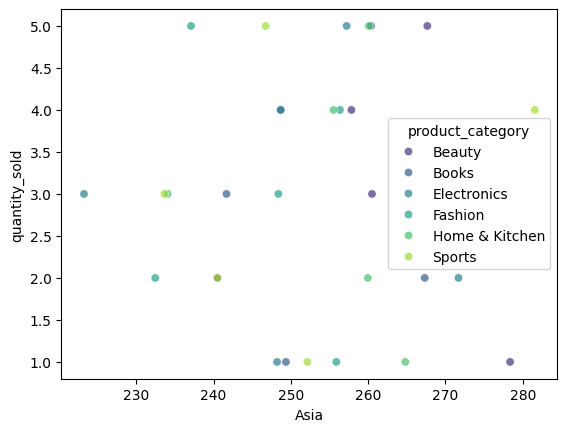

In [75]:
sns.scatterplot(title="Quantity Sold by Region and Product Category in Asia")
sns.scatterplot(data=df_quantity_sold,x="Asia",y="quantity_sold",hue="product_category",palette="viridis",alpha=0.7)

<Axes: title={'center': 'Quantity Sold by Region and Product Category in North America'}, xlabel='North America', ylabel='quantity_sold'>

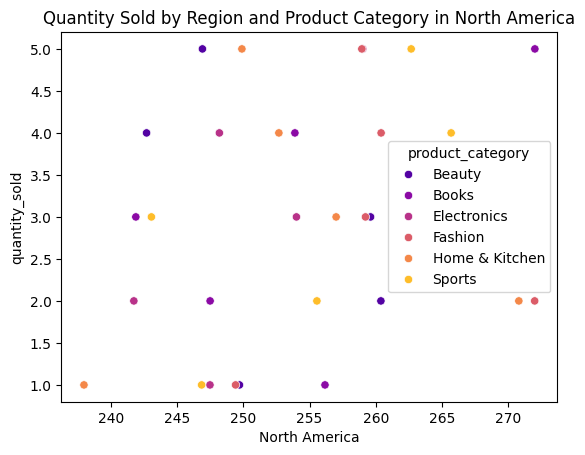

In [86]:
plt.title("Quantity Sold by Region and Product Category in North America")
sns.scatterplot(data=df_quantity_sold,x="North America",y="quantity_sold",hue="product_category",palette= "plasma")

<Axes: title={'center': 'Quantity Sold by Region and Product Category in Middle East'}, xlabel='Middle East', ylabel='quantity_sold'>

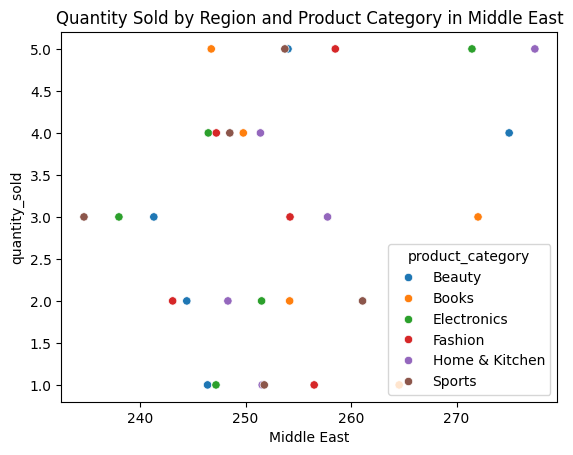

In [77]:
plt.title("Quantity Sold by Region and Product Category in Middle East")
sns.scatterplot(data=df_quantity_sold,x="Middle East",y="quantity_sold",hue="product_category")

<Axes: title={'center': 'Quantity Sold by Region and Product Category in Europe'}, xlabel='Europe', ylabel='quantity_sold'>

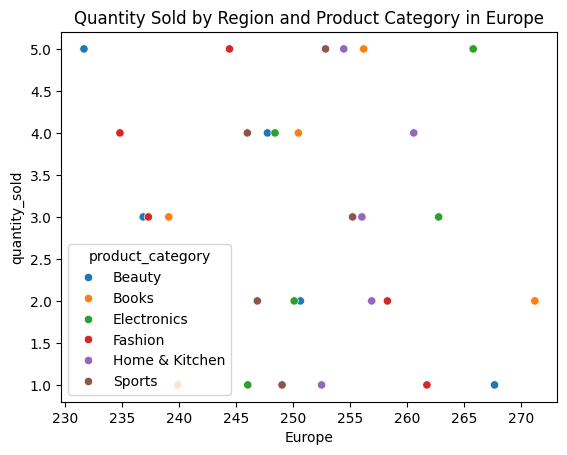

In [79]:
plt.title("Quantity Sold by Region and Product Category in Europe")
sns.scatterplot(data=df_quantity_sold,x="Europe",y="quantity_sold",hue="product_category")

C:\Users\emirc\AppData\Local\Temp\ipykernel_28276\3037610981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="customer_region",y="rating",palette="pastel",alpha=0.7)


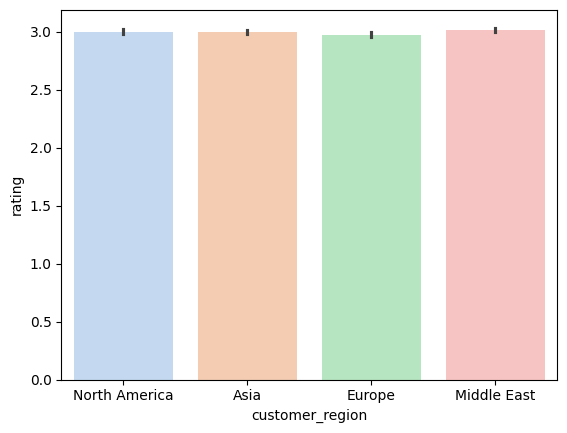

In [85]:
#Average Ratings by Customer Region
sns.barplot(title= "Average Ratings by Customer Region")
sns.barplot(data=df,x="customer_region",y="rating",palette="pastel",alpha=0.7)
plt.show()

In [89]:
"## Key Findings and Insights\n",
"Based on the statistical analysis and data visualizations performed in this notebook, here are the primary conclusions:\n",
"\n",
"### 1. Consumer Review Behavior\n",
"* **Category Trends:** There is a notable difference in how customers engage with products across regions. \n",
"* **Asian Market:** Customers in Asia show the highest engagement (reviews) specifically for **Electronic products**.\n",
"* **European Market:** European customers are more likely to provide feedback on **Home & Kitchen** and **Sports** categories.\n",
"* **American Market:** Engagement is significantly higher in the **Personal Care/Beauty** categories within North America.\n",
"\n",
"### 2. Statistical Analysis Results\n",
"* **Category Comparison (Chi-Square Test):** We tested if there is a significant difference between 'Sports' and 'Beauty' product sales over the years. With a p-value > 0.05, we conclude there is **no statistically significant difference** between the sales performance of these two categories.\n",
"* **Regional Ratings (ANOVA Test):** We compared average customer ratings across different regions (Asia, Europe, etc.). The ANOVA test resulted in a p-value of 1.0, indicating that **customer satisfaction (ratings) is uniform across all geographic regions**.\n",
"\n",
"### 3. Revenue and Pricing Insights\n",
"* The relationship between **Price** and **Quantity Sold** remains consistent across most regions, though revenue peaks are observed in specific high-demand categories depending on the regional preference.\n",
"* The **Review-to-Sale ratio** suggests that certain categories (like Electronics in Asia) have a higher customer conversion or loyalty rate in terms of post-purchase engagement."

'* The **Review-to-Sale ratio** suggests that certain categories (like Electronics in Asia) have a higher customer conversion or loyalty rate in terms of post-purchase engagement.'